In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_blood_c = {}
for num in num_list:
    fn = 'gc-avg-blood-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_blood_c[num] = avg_rc

In [3]:
df_avgrcs_blood_c = pd.DataFrame(avgrcs_blood_c)
temp_blood_c = df_avgrcs_blood_c.T
temp_blood_c = temp_blood_c.reset_index()
temp_blood_c = pd.melt(temp_blood_c, id_vars = ["index"], value_vars = list(set(temp_blood_c.columns.tolist())))
temp_blood_c['label'] = 'bloodPeak_cancerFile'
#temp_blood_c = temp_coad_c[temp_coad_c.variable <= 501]
temp_blood_c

,index,variable,value,label
0,809_030915,0,1.016418,bloodPeak_cancerFile
1,809_110914,0,1.001280,bloodPeak_cancerFile
2,986_100215,0,1.012452,bloodPeak_cancerFile
3,986_261016,0,1.011648,bloodPeak_cancerFile
4,809_030915,1,1.015227,bloodPeak_cancerFile
...,...,...,...,...
1999,986_261016,499,1.004661,bloodPeak_cancerFile
2000,809_030915,500,0.989019,bloodPeak_cancerFile
2001,809_110914,500,1.005780,bloodPeak_cancerFile
2002,986_100215,500,1.011182,bloodPeak_cancerFile


In [4]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_blood_h = {}
for num in num_list:
    fn = 'gc-avg-blood-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_blood_h[num] = avg_rc

In [5]:
df_avgrcs_blood_h = pd.DataFrame(avgrcs_blood_h)
temp_blood_h = df_avgrcs_blood_h.T
temp_blood_h = temp_blood_h.reset_index()
temp_blood_h = pd.melt(temp_blood_h, id_vars = ["index"], value_vars = list(set(temp_blood_h.columns.tolist())))
temp_blood_h['label'] = 'bloodPeak_healthyFile'
#temp_blood_h = temp_blood_h[temp_blood_h.variable <= 501]
temp_blood_h

,index,variable,value,label
0,556,0,1.030219,bloodPeak_healthyFile
1,557,0,1.025465,bloodPeak_healthyFile
2,558,0,1.019577,bloodPeak_healthyFile
3,559,0,1.017135,bloodPeak_healthyFile
4,560,0,1.031503,bloodPeak_healthyFile
...,...,...,...,...
8512,568,500,1.009522,bloodPeak_healthyFile
8513,569,500,1.012183,bloodPeak_healthyFile
8514,570,500,1.004571,bloodPeak_healthyFile
8515,571,500,1.003759,bloodPeak_healthyFile


In [6]:
temp_blood = pd.concat([temp_blood_h, temp_blood_c], ignore_index = True)
temp_blood['new_variable'] = temp_blood['variable'] - 250
temp_blood

,index,variable,value,label,new_variable
0,556,0,1.030219,bloodPeak_healthyFile,-250
1,557,0,1.025465,bloodPeak_healthyFile,-250
2,558,0,1.019577,bloodPeak_healthyFile,-250
3,559,0,1.017135,bloodPeak_healthyFile,-250
4,560,0,1.031503,bloodPeak_healthyFile,-250
...,...,...,...,...,...
10516,986_261016,499,1.004661,bloodPeak_cancerFile,249
10517,809_030915,500,0.989019,bloodPeak_cancerFile,250
10518,809_110914,500,1.005780,bloodPeak_cancerFile,250
10519,986_100215,500,1.011182,bloodPeak_cancerFile,250


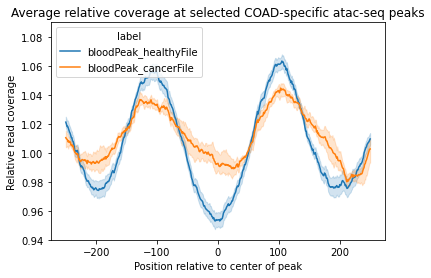

In [7]:
plt.figure()
plt.ylim(0.94,1.09)
p = sns.lineplot(data = temp_blood, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected COAD-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')

In [8]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_blood_c_zo = {}
for num in num_list:
    fn = 'gc-zo-avg-blood-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_blood_c_zo[num] = avg_rc

In [9]:
df_avgrcs_blood_c_zo = pd.DataFrame(avgrcs_blood_c_zo)
temp_blood_c_zo = df_avgrcs_blood_c_zo.T
temp_blood_c_zo = temp_blood_c_zo.reset_index()
temp_blood_c_zo = pd.melt(temp_blood_c_zo, id_vars = ["index"], value_vars = list(set(temp_blood_c_zo.columns.tolist())))
temp_blood_c_zo['label'] = 'bloodPeak_cancerFile'
#temp_coad_c_zo = temp_coad_c_zo[temp_coad_c_zo.variable <= 501]
temp_blood_c_zo

,index,variable,value,label
0,809_030915,0,1.002996,bloodPeak_cancerFile
1,809_110914,0,1.008930,bloodPeak_cancerFile
2,986_100215,0,1.002794,bloodPeak_cancerFile
3,986_261016,0,1.009125,bloodPeak_cancerFile
4,809_030915,1,1.002955,bloodPeak_cancerFile
...,...,...,...,...
7995,986_261016,1998,0.986764,bloodPeak_cancerFile
7996,809_030915,1999,0.982049,bloodPeak_cancerFile
7997,809_110914,1999,0.980588,bloodPeak_cancerFile
7998,986_100215,1999,0.997802,bloodPeak_cancerFile


In [10]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_blood_h_zo = {}
for num in num_list:
    fn = 'gc-zo-avg-blood-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_blood_h_zo[num] = avg_rc

In [11]:
df_avgrcs_blood_h_zo = pd.DataFrame(avgrcs_blood_h_zo)
temp_blood_h_zo = df_avgrcs_blood_h_zo.T
temp_blood_h_zo = temp_blood_h_zo.reset_index()
temp_blood_h_zo = pd.melt(temp_blood_h_zo, id_vars = ["index"], value_vars = list(set(temp_blood_h_zo.columns.tolist())))
temp_blood_h_zo['label'] = 'bloodPeak_healthyFile'
#temp_coad_h_zo = temp_coad_h_zo[temp_coad_h.variable <= 501]
temp_blood_h_zo

,index,variable,value,label
0,556,0,1.002592,bloodPeak_healthyFile
1,557,0,0.994218,bloodPeak_healthyFile
2,558,0,1.009999,bloodPeak_healthyFile
3,559,0,0.995066,bloodPeak_healthyFile
4,560,0,1.004419,bloodPeak_healthyFile
...,...,...,...,...
33995,568,1999,0.990728,bloodPeak_healthyFile
33996,569,1999,0.980723,bloodPeak_healthyFile
33997,570,1999,0.950423,bloodPeak_healthyFile
33998,571,1999,0.968660,bloodPeak_healthyFile


In [12]:
temp_blood_zo = pd.concat([temp_blood_h_zo, temp_blood_c_zo], ignore_index = True)
temp_blood_zo['new_variable'] = temp_blood_zo['variable'] - 1000
temp_blood_zo

,index,variable,value,label,new_variable
0,556,0,1.002592,bloodPeak_healthyFile,-1000
1,557,0,0.994218,bloodPeak_healthyFile,-1000
2,558,0,1.009999,bloodPeak_healthyFile,-1000
3,559,0,0.995066,bloodPeak_healthyFile,-1000
4,560,0,1.004419,bloodPeak_healthyFile,-1000
...,...,...,...,...,...
41995,986_261016,1998,0.986764,bloodPeak_cancerFile,998
41996,809_030915,1999,0.982049,bloodPeak_cancerFile,999
41997,809_110914,1999,0.980588,bloodPeak_cancerFile,999
41998,986_100215,1999,0.997802,bloodPeak_cancerFile,999


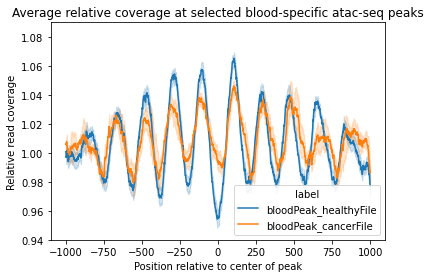

In [14]:
plt.figure()
plt.ylim(0.94,1.09)
p = sns.lineplot(data = temp_blood_zo, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected blood-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')